In [ ]:
# SVM Npn Non Linear

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

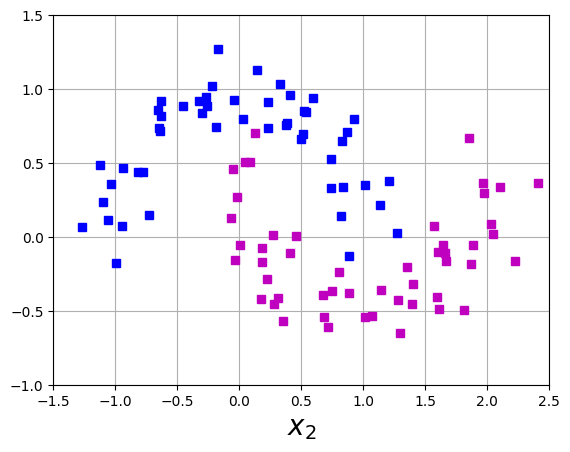

In [ ]:
#from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Define a function to plot the dataset
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.xlabel(r"$x_2$", fontsize=20, rotation=0)

# Let's hava a look at the data we have generated
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
# Define a function plot the decision boundaries
def plot_predictions(clf, axes):
  # Create data in continous linear space
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
# Create a pipeline to create features, scale data and fit the model
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))
# Call the pipeline
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

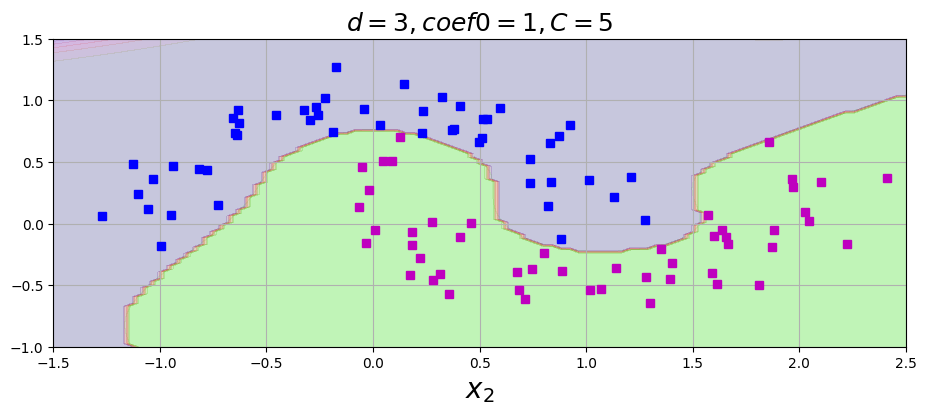

In [ ]:
# Plot the decision boundaries
plt.figure(figsize=(11, 4))

# Plot the decision boundaries
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

# Plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, coef0=1, C=5$", fontsize=18)
plt.show()